# import, data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
COLUMNS = ["user_id" ,"trip", "course", "place_id","place_name", "place_category","rating", "review", "place_address", "place_lat", "place_lng","y", "belief", "y_pred"]

In [4]:
data_0 = pd.read_csv('/content/drive/MyDrive/deepFM_result_data/couple_b.csv', names = COLUMNS, header=None, skiprows = 1)

data_family_after = pd.read_csv('/content/drive/MyDrive/deepFM_result_data/family_b.csv', names = COLUMNS, header=None, skiprows = 1)

data_hotel_after = pd.read_csv('/content/drive/MyDrive/deepFM_result_data/hotel_b.csv', names = COLUMNS, header=None, skiprows = 1)

data_guesthouse_after = pd.read_csv('/content/drive/MyDrive/deepFM_result_data/guesthouse_b.csv', names = COLUMNS, header=None, skiprows = 1)

data_pension_after = pd.read_csv('/content/drive/MyDrive/deepFM_result_data/pension_b.csv', names = COLUMNS, header=None, skiprows = 1)

In [5]:
data_couple_after = data_0.fillna(data_0['place_lat'].mean())
data_couple_after.loc[221]

user_id                           446
trip                           couple
course                              2
place_id                           96
place_name                  강릉정동진해안단구
place_category                  관광,명소
rating                              0
review                              0
place_address     강원 강릉시 강동면 심곡리 1-11
place_lat                     37.6663
place_lng                     129.055
y                                   0
belief                              0
y_pred                       0.122043
Name: 221, dtype: object

In [6]:
data_couple_after

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
0,649,couple,1,50,호텔탑스텐 금진온천,온천,5.0,2,강원 강릉시 옥계면 헌화로 455-34 1층,37.653282,129.051482,0,0,0.414326
1,649,couple,1,5,정동진해변,"해수욕장,해변",4.1,123,강원 강릉시 강동면 정동진리 64-3,37.689094,129.034821,0,0,0.405592
2,649,couple,1,36,강릉월화거리,테마거리,4.0,82,강원 강릉시 경강로 2111,37.756207,128.896984,0,0,0.318382
3,649,couple,1,94,석병산,산,0.0,12,강원 강릉시 옥계면 산계리 산 428,37.578900,128.947873,0,0,0.305580
4,649,couple,2,33,강릉임해자연휴양림,자연휴양림,4.8,9,강원 강릉시 강동면 율곡로 1715-85,37.718520,128.998528,0,0,0.214631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,596,couple,1,96,강릉정동진해안단구,"관광,명소",0.0,0,강원 강릉시 강동면 심곡리 1-11,37.666250,129.054547,0,0,0.366635
246,596,couple,1,94,석병산,산,0.0,12,강원 강릉시 옥계면 산계리 산 428,37.578900,128.947873,0,0,0.267434
247,596,couple,1,98,강릉구라미온천,온천,1.7,1,강원 강릉시 사천면 구라미등길 25-15,37.843541,128.839674,0,0,0.249776
248,596,couple,1,111,동대산,산,5.0,12,강원 강릉시 연곡면 삼산리 산 4,37.839949,128.656687,0,0,0.161636


# entropy diversity 함수

In [7]:
def get_entropy_diversity(data):
  entropy_diversity = 0
  for i in range(250):
    place_id = data.loc[i]['place_id']
    count = 1
    for j in range(250):
      if j!=i:
        compare_place_id = data.loc[j]['place_id']
        if place_id == compare_place_id:
          count += 1
    p = count/250
    aoi = -math.log(p)
    expected_value = p*aoi
    entropy_diversity += expected_value
  return entropy_diversity

# entropy diversity 구하기

In [8]:
total_entropy = np.zeros(shape=5)
total_entropy[0] = get_entropy_diversity(data_couple_after)
total_entropy[1] = get_entropy_diversity(data_family_after)
total_entropy[2] = get_entropy_diversity(data_hotel_after)
total_entropy[3] = get_entropy_diversity(data_guesthouse_after)
total_entropy[4] = get_entropy_diversity(data_pension_after)

entropy = sum(total_entropy)/len(total_entropy)
print(total_entropy)
print(entropy)

[24.19276386 25.56084239 42.92988678 31.80666276 42.62557616]
33.42314638943616


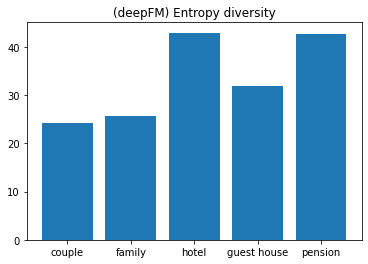

In [9]:
x_axis = ['couple', 'family', 'hotel', 'guest house', 'pension']
plt.bar(x_axis,total_entropy)
plt.title('(deepFM) Entropy diversity')
plt.show()